In [1]:
import heapq

class node:
    def __init__(self,freq,symbol,left=None,right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right
        self.huff= ''
        
    def __lt__(self,nxt):
        return self.freq < nxt.freq
    
def printnodes(node, val=''):
    newval = val + str(node.huff)
    
    if node.left:
        printnodes(node.left, newval)
    if node.right:
        printnodes(node.right, newval)
    if not node.left and not node.right:
        print("{} -> {}".format(node.symbol, newval))
        
if __name__=='__main__':
    chars = ['a','b','c','d','e','f']
    freq = [5,9,12,13,16,45]
    nodes = []
    
    for i in range(len(chars)):
        heapq.heappush(nodes, node(freq[i], chars[i]))
        
    while len(nodes) > 1:
        left = heapq.heappop(nodes)
        right = heapq.heappop(nodes)
        
        left.huff = 0
        right.huff = 1
        
        newnode = node(left.freq + right.freq, left.symbol + right.symbol, left, right)
        
        heapq.heappush(nodes, newnode)
        
    printnodes(nodes[0])

f -> 0
c -> 100
d -> 101
a -> 1100
b -> 1101
e -> 111


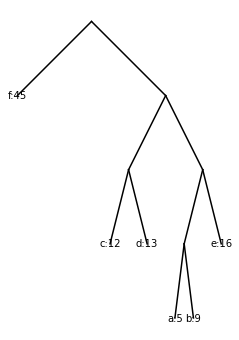

In [6]:
import heapq
import matplotlib.pyplot as plt

class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(chars, freq):
    nodes = [Node(char, f) for char, f in zip(chars, freq)]
    heapq.heapify(nodes)

    while len(nodes) > 1:
        left = heapq.heappop(nodes)
        right = heapq.heappop(nodes)
        new_node = Node(None, left.freq + right.freq)
        new_node.left = left
        new_node.right = right
        heapq.heappush(nodes, new_node)

    return nodes[0]  # The root of the Huffman tree

def visualize_huffman_tree(node, ax, x, y, dx, dy, level=0):
    if node is not None:
        if node.char:
            ax.text(x, y, f"{node.char}:{node.freq}", ha='center', va='center')
        if node.left:
            ax.plot([x, x - dx], [y, y - dy], 'k')
            visualize_huffman_tree(node.left, ax, x - dx, y - dy, dx / 2, dy, level + 1)
        if node.right:
            ax.plot([x, x + dx], [y, y - dy], 'k')
            visualize_huffman_tree(node.right, ax, x + dx, y - dy, dx / 2, dy, level + 1)

chars = ['a', 'b', 'c', 'd', 'e', 'f']
freq = [5, 9, 12, 13, 16, 45]

root = build_huffman_tree(chars, freq)

fig, ax = plt.subplots(figsize=(8, 6))
visualize_huffman_tree(root, ax, x=0, y=0, dx=20, dy=20)

ax.set_aspect('equal')
ax.axis('off')
plt.show()
